In [45]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sklearn
from scipy.stats import skew, kurtosis, entropy
from scipy.fft import fft

In [2]:
dir_path = r'C:\Users\Admin\Desktop\DS203\E7\MFCC-files-v2'
dir_files = os.listdir(dir_path)
print((dir_files))

ls_files = []

for file_name in dir_files:
    file_path = os.path.join(dir_path, file_name)
    mfcc_arr = genfromtxt(file_path, delimiter=',')
    ls_files.append(mfcc_arr)
    
print(len(ls_files))

['01-MFCC.csv', '02-MFCC.csv', '03-MFCC.csv', '04-MFCC.csv', '05-MFCC.csv', '06-MFCC.csv', '07-MFCC.csv', '08-MFCC.csv', '09-MFCC.csv', '10-MFCC.csv', '100-MFCC.csv', '101-MFCC.csv', '102-MFCC.csv', '103-MFCC.csv', '104-MFCC.csv', '105-MFCC.csv', '106-MFCC.csv', '107-MFCC.csv', '108-MFCC.csv', '109-MFCC.csv', '11-MFCC.csv', '110-MFCC.csv', '111-MFCC.csv', '112-MFCC.csv', '113-MFCC.csv', '114-MFCC.csv', '115-MFCC.csv', '116-MFCC.csv', '12-MFCC.csv', '13-MFCC.csv', '14-MFCC.csv', '15-MFCC.csv', '16-MFCC.csv', '17-MFCC.csv', '18-MFCC.csv', '19-MFCC.csv', '20-MFCC.csv', '21-MFCC.csv', '22-MFCC.csv', '23-MFCC.csv', '24-MFCC.csv', '25-MFCC.csv', '26-MFCC.csv', '27-MFCC.csv', '28-MFCC.csv', '29-MFCC.csv', '30-MFCC.csv', '31-MFCC.csv', '32-MFCC.csv', '33-MFCC.csv', '34-MFCC.csv', '35-MFCC.csv', '36-MFCC.csv', '37-MFCC.csv', '38-MFCC.csv', '39-MFCC.csv', '40-MFCC.csv', '41-MFCC.csv', '42-MFCC.csv', '43-MFCC.csv', '44-MFCC.csv', '45-MFCC.csv', '46-MFCC.csv', '47-MFCC.csv', '48-MFCC.csv', '49-MFC

In [3]:
new_ls_files = []
for i in range(len(ls_files)):
    lx = ls_files[i][0].shape[0]
    q = lx//100
    new_ls_file = ls_files[i][:, :q*100]
    new_ls_files.append(new_ls_file)
    
print(len(new_ls_files)) 

116


In [16]:
def calculateMeans(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_mean_elements = []
    for i in range(5):
        mean = np.mean(array[:, q*i:q*(i+1)], axis=1)
        ls_mean_elements.append(mean)
        
    ls_mean_elements = np.array(ls_mean_elements)
    ls_mean_elements = ls_mean_elements.reshape(20, -1)
    return ls_mean_elements


def calculateVariance(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_var_elements = []
    for i in range(5):
        var = np.var(array[:, q*i:q*(i+1)], axis=1)
        ls_var_elements.append(var)
    
    ls_var_elements = np.array(ls_var_elements)
    ls_var_elements = ls_var_elements.reshape(20, -1)
    return ls_var_elements

def calculateMinMax(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_min_elements = []
    ls_max_elements = []
    for i in range(5):
        min = np.min(array[:, q*i:q*(i+1)], axis=1)
        max = np.max(array[:, q*i:q*(i+1)], axis=1)
        ls_min_elements.append(min)
        ls_max_elements.append(max)
    
    ls_min_elements = np.array(ls_min_elements)
    ls_min_elements = ls_min_elements.reshape(20, -1)
    
    ls_max_elements = np.array(ls_max_elements)
    ls_max_elements = ls_max_elements.reshape(20, -1)
    return ls_min_elements, ls_max_elements

def calculateMedian(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_median_elements = []
    for i in range(5):
        val = np.median(array[:, q*i:q*(i+1)], axis=1)
        ls_median_elements.append(val)
    
    ls_median_elements = np.array(ls_median_elements)
    ls_median_elements = ls_median_elements.reshape(20, -1)
    return ls_median_elements

def calculateSumPTP(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_sum_elements = []
    ls_ptp_elements = []
    for i in range(5):
        sum = np.sum(array[:, q*i:q*(i+1)], axis=1)
        ptp = np.ptp(array[:, q*i:q*(i+1)], axis=1)
        ls_sum_elements.append(sum)
        ls_ptp_elements.append(ptp)
    
    ls_sum_elements = np.array(ls_sum_elements)
    ls_sum_elements = ls_sum_elements.reshape(20, -1)
    
    ls_ptp_elements = np.array(ls_ptp_elements)
    ls_ptp_elements = ls_ptp_elements.reshape(20, -1)
    return ls_sum_elements, ls_ptp_elements

def calculateSkewKurtosis(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_skew_elements = []
    ls_kurtosis_elements = []
    for i in range(q):
        skew_val = skew(array[:, q*i:q*(i+1)], axis=1)
        kurtosis_val = kurtosis(array[:, q*i:q*(i+1)], axis=1)
        ls_skew_elements.append(skew_val)
        ls_kurtosis_elements.append(kurtosis_val)
    
    ls_skew_elements = np.array(ls_skew_elements)
    ls_skew_elements = ls_skew_elements.reshape(20, -1)
    
    ls_kurtosis_elements = np.array(ls_kurtosis_elements)
    ls_kurtosis_elements = ls_kurtosis_elements.reshape(20, -1)
    return ls_skew_elements, ls_kurtosis_elements

In [17]:
def calculateStatistics(array):
    mean = calculateMeans(array)
    var = calculateVariance(array)
    min, max = calculateMinMax(array)
    median = calculateMedian(array)
    sum, ptp = calculateSumPTP(array)
    # skew_val, kurtosis_val = calculateSkewKurtosis(array)
    
    features = np.concatenate((mean, var, min, max, median, sum, ptp), axis=1) 
    return features

In [18]:
features_list = []
for i in range(len(new_ls_files)):
    features = calculateStatistics(new_ls_files[i])
    features_list.append(features)

In [20]:
def calculateSpectralEnergy(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_spectral_energy_elements = []
    for i in range(5):
        spectral_energy = np.sum(np.abs(array[:, q*i:q*(i+1)])**2, axis=1)
        ls_spectral_energy_elements.append(spectral_energy)
        
    ls_spectral_energy_elements = np.array(ls_spectral_energy_elements)
    ls_spectral_energy_elements = ls_spectral_energy_elements.reshape(20, -1)
    return ls_spectral_energy_elements

def calculateDominantFrequency(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_dominant_frequency_elements = []
    for i in range(5):
        dominant_frequency = np.argmax(np.abs(fft(array[:, q*i:q*(i+1)], axis=1)), axis=1)
        ls_dominant_frequency_elements.append(dominant_frequency)
        
    ls_dominant_frequency_elements = np.array(ls_dominant_frequency_elements)
    ls_dominant_frequency_elements = ls_dominant_frequency_elements.reshape(20, -1)
    return ls_dominant_frequency_elements

def calculatePercentile(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_percentile_25_elements = []
    ls_percentile_75_elements = []
    for i in range(5):
        percentile_25 = np.percentile(array[:, q*i:q*(i+1)], 25, axis=1)
        percentile_75 = np.percentile(array[:, q*i:q*(i+1)], 75, axis=1)
        ls_percentile_25_elements.append(percentile_25)
        ls_percentile_75_elements.append(percentile_75)
    
    ls_percentile_25_elements = np.array(ls_percentile_25_elements)
    ls_percentile_25_elements = ls_percentile_25_elements.reshape(20, -1)
    
    ls_percentile_75_elements = np.array(ls_percentile_75_elements)
    ls_percentile_75_elements = ls_percentile_75_elements.reshape(20, -1)
    return ls_percentile_25_elements, ls_percentile_75_elements

def calculateSignalEntropy(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_signal_entropy_elements = []
    for i in range(5):
        signal_entropy = entropy(array[:, q*i:q*(i+1)], axis=1)
        ls_signal_entropy_elements.append(signal_entropy)
        
    ls_signal_entropy_elements = np.array(ls_signal_entropy_elements)
    ls_signal_entropy_elements = ls_signal_entropy_elements.reshape(20, -1)
    return ls_signal_entropy_elements

def calculateZeroCrossingRate(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_zcr_elements = []
    for i in range(5):
        zcr = np.sum(np.diff(np.sign(array[:, q*i:q*(i+1)]), axis=1) != 0, axis=1)
        ls_zcr_elements.append(zcr)
        
    ls_zcr_elements = np.array(ls_zcr_elements)
    ls_zcr_elements = ls_zcr_elements.reshape(20, -1)
    return ls_zcr_elements

def calculateRMS(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_rms_elements = []
    for i in range(5):
        rms = np.sqrt(np.sum(array[:, q*i:q*(i+1)]**2, axis=1))
        ls_rms_elements.append(rms)
        
    ls_rms_elements = np.array(ls_rms_elements)
    ls_rms_elements = ls_rms_elements.reshape(20, -1)
    return ls_rms_elements


def calculateVarAbsDiff(array):
    array = np.array(array)
    q = array[0].shape[0]//5
    ls_vad_elements = []
    for i in range(5):
        vad = np.var(np.diff(array[:, q*i:q*(i+1)], axis=1), axis=1)
        ls_vad_elements.append(vad)
        
    ls_vad_elements = np.array(ls_vad_elements)
    ls_vad_elements = ls_vad_elements.reshape(20, -1)
    return ls_vad_elements

In [21]:
def calculateRelvantFeatures(array):
    spectral_energy = calculateSpectralEnergy(array)
    dominant_frequency = calculateDominantFrequency(array)
    percentile_25, percentile_75 = calculatePercentile(array)
    # signal_entropy = calculateSignalEntropy(array)
    zero_crossing_rate = calculateZeroCrossingRate(array)
    root_mean_square = calculateRMS(array)
    variance_absolute_difference = calculateVarAbsDiff(array)
    
    features = np.concatenate((spectral_energy, dominant_frequency, zero_crossing_rate, percentile_25, percentile_75, root_mean_square, variance_absolute_difference), axis=1)
    return features

In [22]:
relevant_features_list = []
for i in range(len(new_ls_files)):
    features = calculateRelvantFeatures(new_ls_files[i])
    relevant_features_list.append(features)


In [23]:
all_features_list = []
for i in range(len(features_list)):
    all_features = np.concatenate((features_list[i], relevant_features_list[i]), axis=1)
    all_features_list.append(all_features)

In [28]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Example data points of different lengths
data_points = all_features_list

# Initialize the distance matrix
distance_matrix = np.zeros((116, 116))

# Calculate pairwise distances
for i in range(116):
    print(f"EPOCH: {i}")
    for j in range(i + 1, 116):
        vec1, vec2 = data_points[i], data_points[j]
        
        # Reshape or flatten as needed, here we flatten
        vec1_flat = vec1.flatten().reshape(-1, 1)
        vec2_flat = vec2.flatten().reshape(-1, 1)
        
        # Calculate distance using FastDTW (or another distance metric)
        distance, _ = fastdtw(vec1_flat, vec2_flat, dist=euclidean)
        
        # Fill in the symmetric distance matrix
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance
    

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11
EPOCH: 12
EPOCH: 13
EPOCH: 14
EPOCH: 15
EPOCH: 16
EPOCH: 17
EPOCH: 18
EPOCH: 19
EPOCH: 20
EPOCH: 21
EPOCH: 22
EPOCH: 23
EPOCH: 24
EPOCH: 25
EPOCH: 26
EPOCH: 27
EPOCH: 28
EPOCH: 29
EPOCH: 30
EPOCH: 31
EPOCH: 32
EPOCH: 33
EPOCH: 34
EPOCH: 35
EPOCH: 36
EPOCH: 37
EPOCH: 38
EPOCH: 39
EPOCH: 40
EPOCH: 41
EPOCH: 42
EPOCH: 43
EPOCH: 44
EPOCH: 45
EPOCH: 46
EPOCH: 47
EPOCH: 48
EPOCH: 49
EPOCH: 50
EPOCH: 51
EPOCH: 52
EPOCH: 53
EPOCH: 54
EPOCH: 55
EPOCH: 56
EPOCH: 57
EPOCH: 58
EPOCH: 59
EPOCH: 60
EPOCH: 61
EPOCH: 62
EPOCH: 63
EPOCH: 64
EPOCH: 65
EPOCH: 66
EPOCH: 67
EPOCH: 68
EPOCH: 69
EPOCH: 70
EPOCH: 71
EPOCH: 72
EPOCH: 73
EPOCH: 74
EPOCH: 75
EPOCH: 76
EPOCH: 77
EPOCH: 78
EPOCH: 79
EPOCH: 80
EPOCH: 81
EPOCH: 82
EPOCH: 83
EPOCH: 84
EPOCH: 85
EPOCH: 86
EPOCH: 87
EPOCH: 88
EPOCH: 89
EPOCH: 90
EPOCH: 91
EPOCH: 92
EPOCH: 93
EPOCH: 94
EPOCH: 95
EPOCH: 96
EPOCH: 97
EPOCH: 98
EPOCH: 99
EPOCH: 100

In [29]:
df = pd.DataFrame(distance_matrix)
df.to_csv("Distance_DTW.csv")

Cluster labels: [0 0 4 2 1 2 2 0 5 1 2 2 1 1 2 2 2 0 0 1 4 2 5 0 4 2 1 2 5 2 0 2 0 0 2 1 4
 2 4 5 1 2 1 4 1 1 2 0 4 2 3 0 2 0 3 4 5 0 4 4 1 1 1 4 2 4 5 4 5 0 4 4 4 4
 4 0 0 0 4 2 4 2 4 4 4 0 5 5 4 2 1 0 4 4 4 2 1 0 5 5 2 4 0 0 2 4 0 4 4 1 5
 0 5 5 0 4]


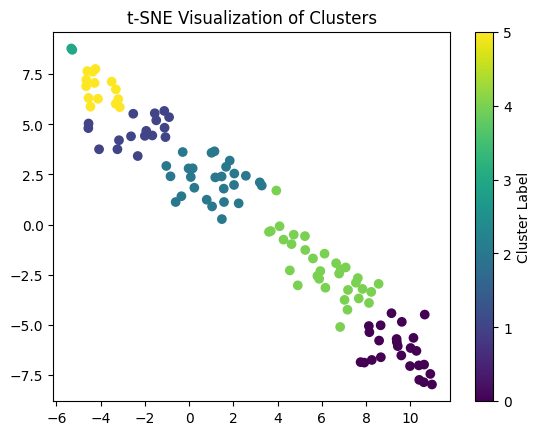

In [42]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform Agglomerative Clustering
clustering = KMeans(n_clusters=6)
labels = clustering.fit_predict(distance_matrix)

print("Cluster labels:", labels)

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2)
points_2d = tsne.fit_transform(distance_matrix)

# Plot the clusters
plt.scatter(points_2d[:, 0], points_2d[:, 1], c=labels, cmap='viridis')
plt.title("t-SNE Visualization of Clusters")
plt.colorbar(label="Cluster Label")
plt.show()


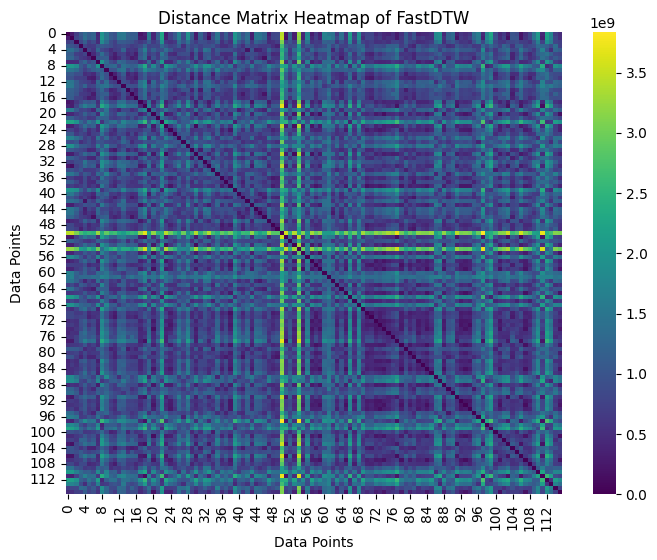

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap="viridis")
plt.title("Distance Matrix Heatmap of FastDTW")
plt.xlabel("Data Points")
plt.ylabel("Data Points")
plt.show()

In [54]:
import numpy as np
import pywt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

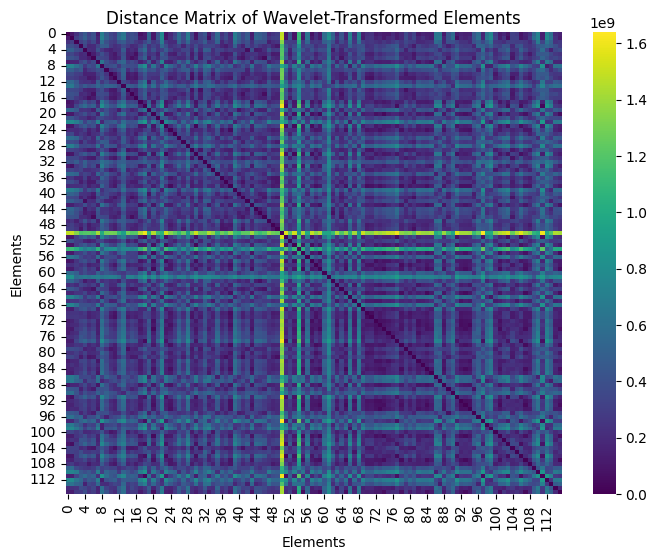

In [67]:
def wavelet_coefficients(signal_matrix, wavelet='db1', level=3):
    coeffs_aggregate = []
    for signal in signal_matrix:
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        coeffs_aggregate.extend(np.concatenate(coeffs))  # Aggregate coefficients
    return np.array(coeffs_aggregate)

data = all_features_list

# Compute wavelet-based feature vectors for each element in data
transformed_data = np.array([wavelet_coefficients(element) for element in data])

dist_matrix = squareform(pdist(transformed_data, metric='euclidean'))

# Plot the distance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, cmap="viridis")
plt.title("Distance Matrix of Wavelet-Transformed Elements")
plt.xlabel("Elements")
plt.ylabel("Elements")
plt.show()

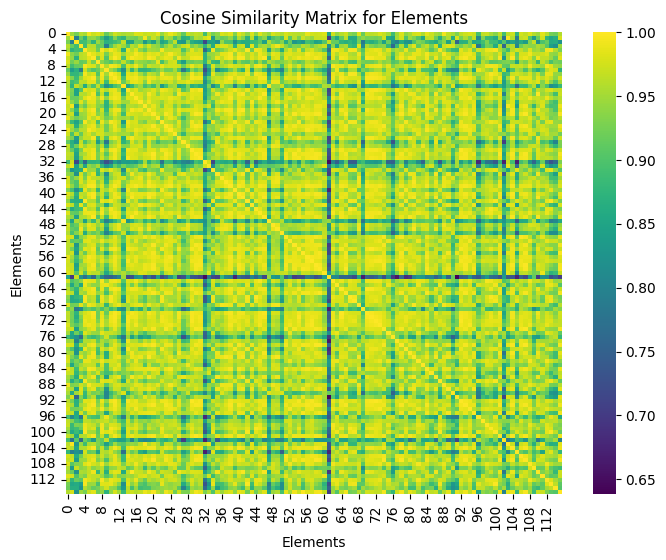

In [66]:
data = all_features_list

flattened_data = np.array([element.flatten() for element in data])

# Calculate cosine distance matrix (1 - cosine similarity)
cosine_dist_matrix = squareform(pdist(flattened_data, metric='cosine'))

# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(1 - cosine_dist_matrix, cmap="viridis", annot=False)
plt.title("Cosine Similarity Matrix for Elements")
plt.xlabel("Elements")
plt.ylabel("Elements")
plt.show()